# **Gamma Ray Spectroscopy**

In [1]:
from sort_csv import *
from process_functions import * 
import matplotlib.pyplot as plt

# Scaling Data Sets

#### Process raw data

In [2]:
bg_noise, bg_noise_uncer = input_bg()
factor, factor_uncer, df_correction  = calculate_correction_factor()
display(df_correction)

/home/dio/Desktop/PHYS128AL/Gamma_Spectroscopy/sort_csv.py:100: RuntimeWarning: overflow encountered in power
  factor = elasped_time_correction * np.e**(activity * t_elasped) * np.e**(-activity * unknown_second)
/home/dio/Desktop/PHYS128AL/Gamma_Spectroscopy/sort_csv.py:100: RuntimeWarning: invalid value encountered in multiply
  factor = elasped_time_correction * np.e**(activity * t_elasped) * np.e**(-activity * unknown_second)


,Unknown,Cs137,Na22,Co57,Co60,Cd109,Ba133,Eu152,Zn65,Mn54
half_life (s),86400.0,948602880.0,81993600.0,23478336.0,166194720.0,39864960.0,334281600.0,426366720.0,21075552.0,26956800.0
produce_date,2019-03-01,2022-11-01,2022-11-03,2022-11-03,2023-01-18,2022-12-16,2023-01-18,2022-09-07,2022-12-01,2019-03-01
t_exp (s),202.07,164.03,108.6,115.54,152.04,143.15,77.2,112.9,83.58,86.05
corr_factor,1.0,1.131907,0.69769,0.056887,0.79703,0.175973,2.029917,1.494032,0.049144,2.348286
uncertainty,1.0,0.001859,0.020903,0.013818,0.008403,0.015927,0.005005,0.003886,0.012178,0.066689


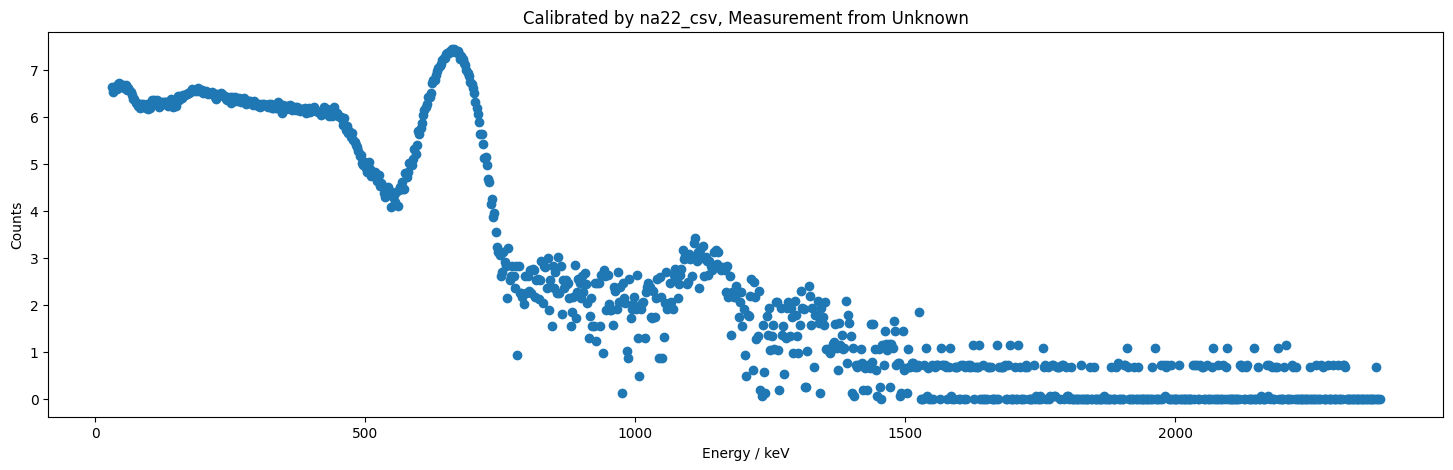

In [3]:
selected_ele = "Unknown"
file_name, energy, countss, countss_uncer = read_data(bg_noise, bg_noise_uncer, 
                                                      factor, factor_uncer, 
                                                      plotting=[selected_ele])

# Spectral Analysis

#### Find the coordinate of the max counts 

Text(0.5, 0, 'Energy / keV')

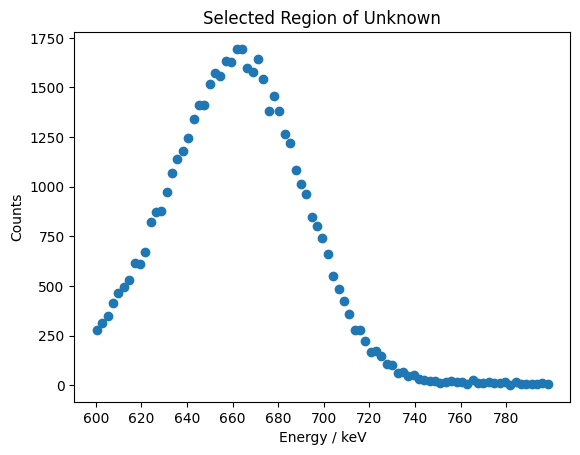

In [4]:
y = countss[file_name.index(selected_ele)]
x = energy
x_min = 600
x_max = 800
x_data, y_data = select_reg(x_min, x_max, x, y)
plt.scatter(x_data, y_data)
plt.title(f"Selected Region of {selected_ele}")
plt.xticks(np.arange(x_min, x_max, int((x_max - x_min)/10)))
plt.ylabel("Counts")
plt.xlabel("Energy / keV")

In [5]:
x_min = 620
x_max = 700
energy_max, counts_max = find_max(x_min, x_max, x_data, y_data)
print(f"The maximum counts of {selected_ele} at range {x_min}keV to {x_max}keV\n"
      f"Located at energy {energy_max}keV, with a total counts of {counts_max}")

The maximum counts of Unknown at range 620keV to 700keV
Located at energy 661.716049382716keV, with a total counts of 1694.3192270839986


#### Gaussian fitting to find spectral properties

N: 97521.00069893374 with uncertainty = 15133.819423338615
Center: 662.8441987484232 with uncertainty = 0.8057129285397155
Peak: 1447.445329602826


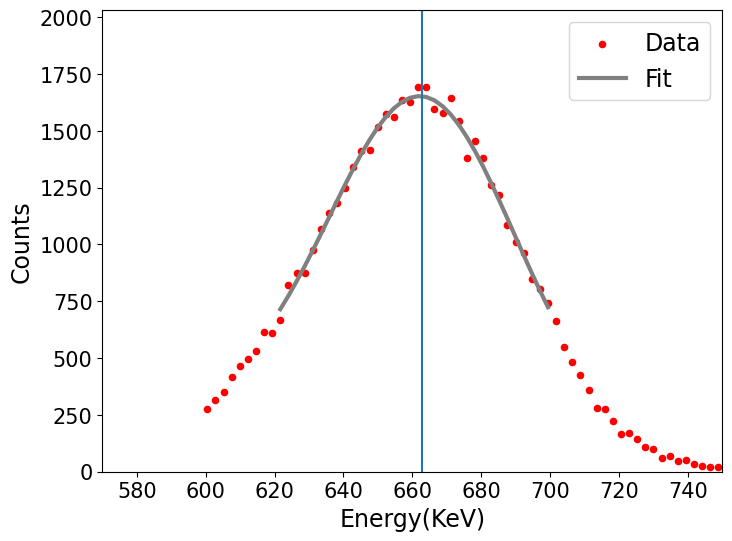

In [6]:
gaussian_fit(x_min, x_max, x_data, y_data)

In [7]:
Unknown = [662.8, 1112]
Unknown_uncer = [0.8,10]

Cs137 = [665.8]
Na22 = [514.9, 1284.5, 1826]
Co57 = [107, 667]
Co60 = [1178, 1335]
Cd107 = [66.3]
Ba133 = [66.3, 348]
Eu152 = [108.8, 243, 344.4]
Zn65 = [508, 1119]
Mn54 = [833]
samples_peak = [Cs137, Na22, Co57, Co60, Cd107, Ba133, Eu152, Zn65, Mn54]
samples_peak_uncer = [[0.7],[2, 10, 10],[3, 10],[1, 3],[2],[2, 4],[0.1, 2, 0.3],[10, 9],[3]]

points = [100 for i in range(len(Unknown))]
names = ["sth" for i in range(len(Unknown))]
peaks = [0 for i in range(len(Unknown))]
peaks_uncer = [0 for i in range(len(Unknown))]
for i in range(len(samples_peak)):
    for j in range(len(Unknown)):
        for k in range(len(samples_peak[i])):
            score = abs(Unknown[j] - samples_peak[i][k])
            if score < points[j]:
                points[j] = score
                names[j] = file_name[i+1]
                peaks[j] = samples_peak[i][k]
                peaks_uncer[j] = samples_peak_uncer[i][k]

print(f"The unknown has peaks in {Unknown[0]} keV and {Unknown[1]} keV")
for i in range(len(Unknown)):
    print(f"At the peak at {Unknown[i]}, the closest isotope is {names[i]} with peak at {peaks[i]}."
          f" With difference of {round(points[i], 3)} +- "
          f"{np.round(np.sqrt(np.square(Unknown_uncer[i]) + np.square(peaks_uncer[i])), 1)}")


The unknown has peaks in 662.8 keV and 1112 keV
At the peak at 662.8, the closest isotope is Cs137 with peak at 665.8. With difference of 3.0 +- 1.1
At the peak at 1112, the closest isotope is Zn65 with peak at 1119. With difference of 7 +- 13.5


## Least Square Prediction on Composition

The predictions are ['Cs137' 'Co57' 'Cd109' 'Zn65']

With proportion of [0.523 0.475 0.225 1.098]
uncertainties = [0.0018, 0.2198, 0.2328, 0.0675]
percentage uncertainty of [  0.344  46.247 103.582   6.149]

The equation that predicts y is stated as 0.523*Cs137 + 0.475*Co57 + 0.225*Cd109 + 1.098*Zn65 = Unknown
Each counts contribution is 98.2432 %, 0.4086 %, 0.5297 %, 0.8185 %, 

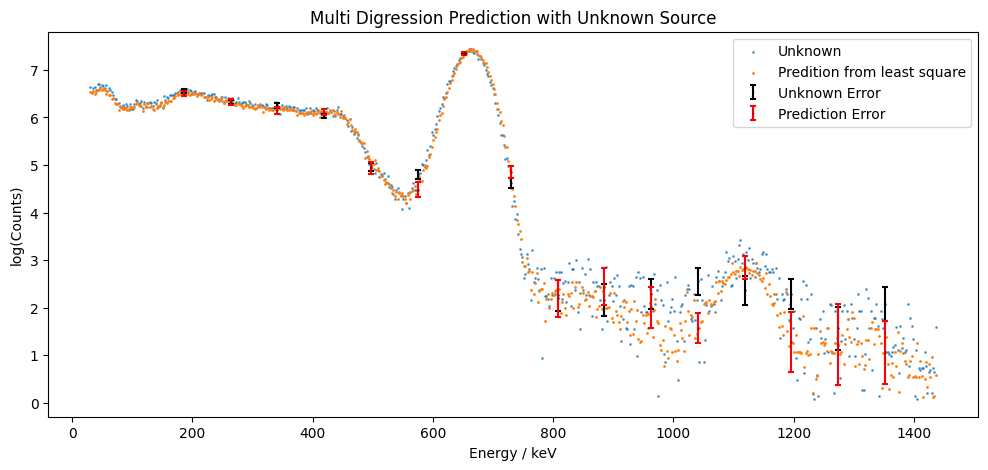

In [8]:
least_square_weights(file_name, energy, 
                     countss, countss_uncer, 
                     cond=0.05, plotting=True)